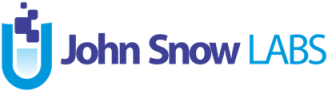

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/dataset-notebooks/SIQA_dataset.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification model using the library. We also support testing LLMS for Question-Answering and Summarization tasks on benchmark datasets. The library supports 50+ out of the box tests. These tests fall into robustness, accuracy, bias, representation, toxicity and fairness test categories.

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[openai,transformers,evaluate]"

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [5]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - |
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# OpenAI Model Testing For Question Answering

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

In [6]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

## SIQA
[SocialIQA: Commonsense Reasoning about Social Interactions](https://arxiv.org/abs/1904.09728)

**Dataset Summary**

Social Interaction QA, a question-answering benchmark for testing social commonsense intelligence. Contrary to many prior benchmarks that focus on physical or taxonomic knowledge, Social IQa focuses on reasoning about people’s actions and their social implications.The actions in Social IQa span a wide variety of social situations, and answer candidates contain both human-curated answers and adversarially-filtered machine-generated candidates.

**Data Splits**

- `test` : Testing set from the SIQA dataset, containing 1954 question and answer examples.
- `test-tiny` : Truncated version of SIQA-test dataset which contains 50 question and answer examples.

### Setup and Configure Harness

In [7]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"SIQA",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


## Robustness

For tests we used uppercase, Dyslexia Word Swap, Add Slangs, Insert Abbreviations and Speech to Text typos . Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [8]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'dyslexia_word_swap':{'min_pass_rate': 0.60}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'dyslexia_word_swap': {'min_pass_rate': 0.6}}}}

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'uppercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'dyslexia_word_swap':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

Here we have configured the harness to perform Five robustness tests and defined the minimum pass rate for each test.

In [9]:
harness.data = harness.data[:20]

### Generating the test cases.

In [10]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1353.00it/s]
- Test 'dyslexia_word_swap': 2 samples removed out of 20



In [11]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,uppercase,Tracy didn't go home that evening and resisted...,What does Tracy need to do before this?\nA. ma...,TRACY DIDN'T GO HOME THAT EVENING AND RESISTED...,WHAT DOES TRACY NEED TO DO BEFORE THIS? A. MAK...
1,robustness,uppercase,Sydney walked past a homeless woman asking for...,How would you describe Sydney?\nA. sympathetic...,SYDNEY WALKED PAST A HOMELESS WOMAN ASKING FOR...,HOW WOULD YOU DESCRIBE SYDNEY? A. SYMPATHETIC ...
2,robustness,uppercase,Sasha protected the patients' rights by making...,What will patients want to do next?\nA. write ...,SASHA PROTECTED THE PATIENTS' RIGHTS BY MAKING...,WHAT WILL PATIENTS WANT TO DO NEXT? A. WRITE N...
3,robustness,uppercase,Jordan was in charge of taking the food on the...,How would Jordan feel afterwards?\nA. horrible...,JORDAN WAS IN CHARGE OF TAKING THE FOOD ON THE...,HOW WOULD JORDAN FEEL AFTERWARDS? A. HORRIBLE ...
4,robustness,uppercase,Kendall opened their mouth to speak and what c...,How would you describe Kendall?\nA. a very qui...,KENDALL OPENED THEIR MOUTH TO SPEAK AND WHAT C...,HOW WOULD YOU DESCRIBE KENDALL? A. A VERY QUIE...
5,robustness,uppercase,Aubrey never told Riley the answer and Riley w...,How would you describe Aubrey?\nA. rude\nB. sm...,AUBREY NEVER TOLD RILEY THE ANSWER AND RILEY W...,HOW WOULD YOU DESCRIBE AUBREY? A. RUDE B. SMUG...
6,robustness,uppercase,Kendall's dog was overweight so they walked it...,Why did Kendall do this?\nA. because it was un...,KENDALL'S DOG WAS OVERWEIGHT SO THEY WALKED IT...,WHY DID KENDALL DO THIS? A. BECAUSE IT WAS UNH...
7,robustness,uppercase,Kendall got a new sports car and could not wai...,What will Kendall want to do next?\nA. drive t...,KENDALL GOT A NEW SPORTS CAR AND COULD NOT WAI...,WHAT WILL KENDALL WANT TO DO NEXT? A. DRIVE TH...
8,robustness,uppercase,Riley layered down their arms with a blanket t...,What does Riley need to do before this?\nA. tu...,RILEY LAYERED DOWN THEIR ARMS WITH A BLANKET T...,WHAT DOES RILEY NEED TO DO BEFORE THIS? A. TUR...
9,robustness,uppercase,Austin knew Quinn intimately and they slept to...,Why did Austin do this?\nA. hated Quinn\nB. fo...,AUSTIN KNEW QUINN INTIMATELY AND THEY SLEPT TO...,WHY DID AUSTIN DO THIS? A. HATED QUINN B. FOUN...


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [12]:
harness.run()

Running testcases... : 100%|██████████| 38/38 [00:28<00:00,  1.34it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [13]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,uppercase,Tracy didn't go home that evening and resisted...,What does Tracy need to do before this?\nA. ma...,TRACY DIDN'T GO HOME THAT EVENING AND RESISTED...,WHAT DOES TRACY NEED TO DO BEFORE THIS? A. MAK...,C. Find somewhere to go,C. Find somewhere to go.,True
1,robustness,uppercase,Sydney walked past a homeless woman asking for...,How would you describe Sydney?\nA. sympathetic...,SYDNEY WALKED PAST A HOMELESS WOMAN ASKING FOR...,HOW WOULD YOU DESCRIBE SYDNEY? A. SYMPATHETIC ...,A. sympathetic,B. LIKE A PERSON WHO WAS UNABLE TO HELP,False
2,robustness,uppercase,Sasha protected the patients' rights by making...,What will patients want to do next?\nA. write ...,SASHA PROTECTED THE PATIENTS' RIGHTS BY MAKING...,WHAT WILL PATIENTS WANT TO DO NEXT? A. WRITE N...,B. get petitions signed,C. LIVE LONGER,False
3,robustness,uppercase,Jordan was in charge of taking the food on the...,How would Jordan feel afterwards?\nA. horrible...,JORDAN WAS IN CHARGE OF TAKING THE FOOD ON THE...,HOW WOULD JORDAN FEEL AFTERWARDS? A. HORRIBLE ...,A. horrible that he let his friends down on t...,A. HORRIBLE THAT HE LET HIS FRIENDS DOWN ON T...,True
4,robustness,uppercase,Kendall opened their mouth to speak and what c...,How would you describe Kendall?\nA. a very qui...,KENDALL OPENED THEIR MOUTH TO SPEAK AND WHAT C...,HOW WOULD YOU DESCRIBE KENDALL? A. A VERY QUIE...,C. a very aggressive and talkative person,C. A VERY AGGRESSIVE AND TALKATIVE PERSON,True
5,robustness,uppercase,Aubrey never told Riley the answer and Riley w...,How would you describe Aubrey?\nA. rude\nB. sm...,AUBREY NEVER TOLD RILEY THE ANSWER AND RILEY W...,HOW WOULD YOU DESCRIBE AUBREY? A. RUDE B. SMUG...,B. smug at knowing the answer,B. SMUG AT KNOWING THE ANSWER,True
6,robustness,uppercase,Kendall's dog was overweight so they walked it...,Why did Kendall do this?\nA. because it was un...,KENDALL'S DOG WAS OVERWEIGHT SO THEY WALKED IT...,WHY DID KENDALL DO THIS? A. BECAUSE IT WAS UNH...,A. because it was unhealthy,A. BECAUSE IT WAS UNHEALTHY,True
7,robustness,uppercase,Kendall got a new sports car and could not wai...,What will Kendall want to do next?\nA. drive t...,KENDALL GOT A NEW SPORTS CAR AND COULD NOT WAI...,WHAT WILL KENDALL WANT TO DO NEXT? A. DRIVE TH...,B. show off his new sports car,B. SHOW OFF HIS NEW SPORTS CAR,True
8,robustness,uppercase,Riley layered down their arms with a blanket t...,What does Riley need to do before this?\nA. tu...,RILEY LAYERED DOWN THEIR ARMS WITH A BLANKET T...,WHAT DOES RILEY NEED TO DO BEFORE THIS? A. TUR...,C. get a blanket from the closet,C. GET A BLANKET FROM THE CLOSET,True
9,robustness,uppercase,Austin knew Quinn intimately and they slept to...,Why did Austin do this?\nA. hated Quinn\nB. fo...,AUSTIN KNEW QUINN INTIMATELY AND THEY SLEPT TO...,WHY DID AUSTIN DO THIS? A. HATED QUINN B. FOUN...,B. found Quinn attractive,B. Found Quinn Attractive,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [14]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,4,16,80%,66%,True
1,robustness,dyslexia_word_swap,6,12,67%,60%,True


## Fairness

Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [ ]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"SIQA",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [ ]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'fairness': {
               'min_gender_rouge1_score': {'min_score': 0.66},
               'min_gender_rouge2_score':{'min_score': 0.60},
               'min_gender_rougeL_score': {'min_score': 0.66},
               'min_gender_rougeLsum_score': {'min_score': 0.66},
               'max_gender_rouge1_score': {'max_score': 0.66},
               'max_gender_rouge2_score':{'max_score': 0.60},
               'max_gender_rougeL_score': {'max_score': 0.66},
               'max_gender_rougeLsum_score': {'max_score': 0.66},




                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'fairness': {'min_gender_rouge1_score': {'min_score': 0.66},
   'min_gender_rouge2_score': {'min_score': 0.6},
   'min_gender_rougeL_score': {'min_score': 0.66},
   'min_gender_rougeLsum_score': {'min_score': 0.66},
   'max_gender_rouge1_score': {'max_score': 0.66},
   'max_gender_rouge2_score': {'max_score': 0.6},
   'max_gender_rougeL_score': {'max_score': 0.66},
   'max_gender_rougeLsum_score': {'max_score': 0.66}}}}

In [ ]:
harness.data=harness.data[:30]

### Generating the Test Cases

In [ ]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4771.68it/s]


In [ ]:
harness.testcases()

,category,test_type,test_case
0,fairness,min_gender_rouge1_score,male
1,fairness,min_gender_rouge1_score,female
2,fairness,min_gender_rouge1_score,unknown
3,fairness,min_gender_rouge2_score,male
4,fairness,min_gender_rouge2_score,female
5,fairness,min_gender_rouge2_score,unknown
6,fairness,min_gender_rougeL_score,male
7,fairness,min_gender_rougeL_score,female
8,fairness,min_gender_rougeL_score,unknown
9,fairness,min_gender_rougeLsum_score,male


### Running the tests

In [ ]:
harness.run()

Running testcases... :   0%|          | 0/24 [00:00<?, ?it/s]

Running testcases... : 100%|██████████| 24/24 [00:47<00:00,  1.36it/s]

### Generated Results

In [ ]:
harness.generated_results()

,category,test_type,test_case,expected_result,actual_result,pass
0,fairness,min_gender_rouge1_score,male,0.66,0.555556,False
1,fairness,min_gender_rouge1_score,female,0.66,0.562500,False
2,fairness,min_gender_rouge1_score,unknown,0.66,0.846154,True
3,fairness,min_gender_rouge2_score,male,0.60,0.555556,False
4,fairness,min_gender_rouge2_score,female,0.60,0.525000,False
5,fairness,min_gender_rouge2_score,unknown,0.60,0.846154,True
6,fairness,min_gender_rougeL_score,male,0.66,0.555556,False
7,fairness,min_gender_rougeL_score,female,0.66,0.562500,False
8,fairness,min_gender_rougeL_score,unknown,0.66,0.846154,True
9,fairness,min_gender_rougeLsum_score,male,0.66,0.555556,False


### Final Results

In [ ]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,fairness,min_gender_rouge1_score,2,1,33%,65%,False
1,fairness,min_gender_rouge2_score,2,1,33%,65%,False
2,fairness,min_gender_rougeL_score,2,1,33%,65%,False
3,fairness,min_gender_rougeLsum_score,2,1,33%,65%,False
4,fairness,max_gender_rouge1_score,1,2,67%,65%,True
5,fairness,max_gender_rouge2_score,1,2,67%,65%,True
6,fairness,max_gender_rougeL_score,1,2,67%,65%,True
7,fairness,max_gender_rougeLsum_score,1,2,67%,65%,True


## Accuracy

Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`

In [ ]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "gpt-3.5-turbo-instruct","hub":"openai"}, 
                  data={"data_source" :"SIQA",
                        "split":"test-tiny"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [ ]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
          'accuracy': {'min_exact_match_score': {'min_score': 0.80},
                        'min_rouge1_score':{'min_score': 0.80},
                        'min_rougeL_score':{'min_score': 0.80},
                        'min_bleu_score':{'min_score': 0.80},
                        'min_rouge2_score':{'min_score': 0.80},
                        'min_rougeLsum_score':{'min_score': 0.80}

                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'accuracy': {'min_exact_match_score': {'min_score': 0.8},
   'min_rouge1_score': {'min_score': 0.8},
   'min_rougeL_score': {'min_score': 0.8},
   'min_bleu_score': {'min_score': 0.8},
   'min_rouge2_score': {'min_score': 0.8},
   'min_rougeLsum_score': {'min_score': 0.8}}}}

In [ ]:
harness.data=harness.data[:30]

### Generating the test cases.

In [ ]:
harness.generate()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4262.50it/s]


In [ ]:
harness.testcases()

,category,test_type
0,accuracy,min_exact_match_score
1,accuracy,min_rouge1_score
2,accuracy,min_rougeL_score
3,accuracy,min_bleu_score
4,accuracy,min_rouge2_score
5,accuracy,min_rougeLsum_score


### Running the tests

In [ ]:
harness.run()

Running testcases... :   0%|          | 0/6 [00:00<?, ?it/s]

Running testcases... :  50%|█████     | 3/6 [00:15<00:11,  3.77s/it]

Running testcases... : 100%|██████████| 6/6 [00:21<00:00,  3.64s/it]


### Generated Results

In [ ]:
harness.generated_results()

,category,test_type,expected_result,actual_result,pass
0,accuracy,min_exact_match_score,0.8,0.600000,False
1,accuracy,min_rouge1_score,0.8,0.666667,False
2,accuracy,min_rougeL_score,0.8,0.650000,False
3,accuracy,min_bleu_score,0.8,0.694521,False
4,accuracy,min_rouge2_score,0.8,0.640000,False
5,accuracy,min_rougeLsum_score,0.8,0.650000,False


### Final Results

In [ ]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,accuracy,min_exact_match_score,1,0,0%,65%,False
1,accuracy,min_rouge1_score,1,0,0%,65%,False
2,accuracy,min_rougeL_score,1,0,0%,65%,False
3,accuracy,min_bleu_score,1,0,0%,65%,False
4,accuracy,min_rouge2_score,1,0,0%,65%,False
5,accuracy,min_rougeLsum_score,1,0,0%,65%,False
